In [1]:
#getting the hang of python and image recognition, with big help from
#https://www.youtube.com/watch?v=gT4F3HGYXf4

#MAKE SURE THAT THE ENVIRONMENT THAT YOU'RE RUNNING IS PYTHON 3.6, OR TENSORFLOW WON'T DO SHIT

#pip install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.12.0-py3-none-any.whl
#pip install tflearn
#pip install tqdm
#pip install opencv-python
#pip install matplot lib

import cv2
print(cv2.__file__)
import sys
sys.path.append('C:/Users/Nathan/Anaconda3/lib/site-packages/cv2.cp37-win_amd64.pyd')
import numpy as np
import os
import tqdm
from random import shuffle
from tqdm import tqdm
#VERY IMPORTANT THAT THE ORDER IS NOT CHANGED -- CHANGED ORDER WILL FORCE CV2 IMPORT TO FAIL, WHICH WILL MAKE ME CRY AND
#SPEND ANOTHER 4 HOURS TRACKING DOWN THE ERROR AND FIXING IT
#installs required for this to work -- only need to run once

C:\Users\Nathan\Anaconda3\envs\py36\lib\site-packages\cv2\cv2.cp36-win_amd64.pyd


In [2]:
#tell the program where to look - change these as needed
TRAIN_DIR = os.path.normpath('C:/Users/Nathan/Documents/Image Rec Video/Training Data')#replace with directory
TEST_DIR = os.path.normpath('C:/Users/Nathan/Documents/Image Rec Video/BigTest')#replace with directory
IMG_SIZE = 50
#IMG_SIZEX = 1202
#IMG_SIZEY = 1002 
#so I thought that I had to adjust this to the size of our images
#but that seemed to break things. Leaving it at 50 for some testing
LR = 1e-3 #small number here means larger learning rate

MODEL_NAME = 'BioImgRec-{}-{}.model'.format(LR, '4conv-basic-rd2') #1 layer for linear;2 for nonlinear;further layers for better classifing

In [9]:
#features: numpy greyscale array from 2d image; labels: group 1 or group 2
#[x ,y] x is "group1-ness", y is "group2-ness"
def label_img(img):
    #0,1, (1) split based on
    word_label = img.split(',')[-2]
    if word_label == '1': return [1,0]
    elif word_label == '0': return [0,1]

def create_train_data():
    train_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        print(path)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        train_data.append([np.array(img), np.array(label)])
    shuffle(train_data)
    np.save('train_data.npy', train_data)
    return train_data

def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        if(img != "desktop.ini"): #for some reason this file was clogging the thing, and I can't delete it. obv desktop.ini isn't an image, so it errors out during resize
            path = os.path.join(TEST_DIR, img)
            img_num = img
            img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
            testing_data.append([np.array(img), img_num])
    shuffle(testing_data)
    np.save('test_data_shuffled_large.npy', testing_data)
    return testing_data
#create_train_data()
process_test_data()

100%|████████████████████████████████████████████████████████████████████████████| 38337/38337 [15:33<00:00, 37.13it/s]


[[array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), 'out16056.tif'],
 [array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), 'out02634.tif'],
 [array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), 'out16053.tif'],
 [array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=uint8), 'out02469.tif'],


In [10]:
def trainModel(model, train_data):

    train = train_data[:-500] #all but the last 500 are training
    test = train_data[-500:] #this is some test data

    #training time
    X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    Y = [i[1] for i in train]

    #testing time
    test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    test_y = [i[1] for i in test]

    model.fit({'input': X}, {'targets': Y}, n_epoch=2, validation_set=({'input': test_x}, {'targets': test_y}),
        snapshot_step=500, show_metric=True, run_id=MODEL_NAME)
#first time runs/reset training data:
#train_data = create_train_data()
#if you already have train data:
train_data = np.load('train_data.npy')

INFO:tensorflow:Restoring parameters from C:\Users\Nathan\Documents\ImageRecWorkspace\BioImgRec-0.001-4conv-basic-rd2.model
Model BioImgRec-0.001-4conv-basic-rd2.model loaded!


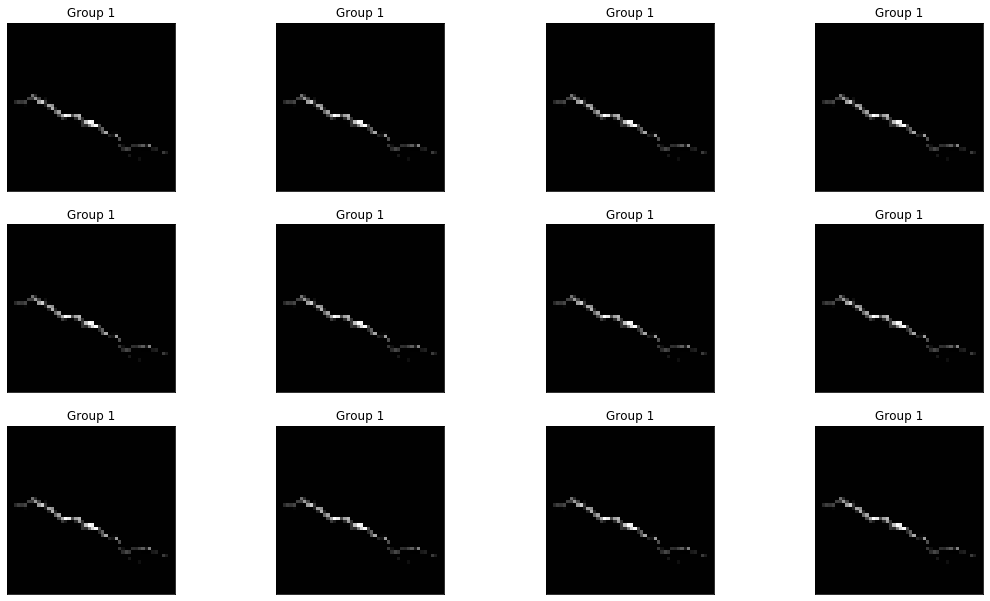

In [30]:
#the heavy lifting
import tensorflow as tf
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

tf.reset_default_graph()#might not be necessary in this

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

#convnet = conv_2d(convnet, 32, 2, activation='relu')
#convnet = max_pool_2d(convnet, 2)

#convnet = conv_2d(convnet, 64, 2, activation='relu')
#convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)


convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='C:/Users/Nathan/Documents/ImageRecWorkspace/log')

if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('Model {} loaded!'.format(MODEL_NAME))

#trainModel(model, train_data)
#for further training only


#tensorboard --logdir=foo:C:\Users\Nathan\Documents\ImageRecWorkspace\log --host=127.0.0.1
#run that from cmd to get into tensorboard, where we can get some good data

#if you're happy, we can do
#model.save(MODEL_NAME)

#first time runs/reset test data:
#test_data = process_test_data()
#if you already have test data:
test_data = np.load('test_data_shuffled_large.npy')

fig = plt.figure()

for num, data in enumerate(test_data[:12]):
    #group 1 [1,0]
    #group 2: [0,1]

    img_num = data[1]
    img_data = data[0]

    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)

    model_out = model.predict([data])[0]

    if (model_out[0] == 1): str_label = "Group 2"
    else: str_label = "Group 1"

    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
fig.set_size_inches(18.5, 10.5)
plt.show()
#fig.savefig('test.png', dpi=200)


In [20]:
#the outputing of results and analysis of character
OUTFILENAME = 'outTestLargeBatch.csv'
with open(OUTFILENAME, 'w') as f:
    f.write('id,label,decision,character shift?,debug\n\n')
with open(OUTFILENAME, 'a') as f:
    analysis = ['']*15
    analysisPointer = 0
    analysisFull = False
    characterShift = 0
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        if (model_out[0] == 1): 
            str_label = "Group 2"
        else: 
            str_label = "Group 1"
        analysis.pop(analysisPointer)
        analysis.insert(analysisPointer, model_out[0])
        if(analysisPointer < 14):
            analysisPointer += 1
        else: 
            analysisPointer = 0
            analysisFull = True
        characterShift = int(analysisFull & (analysis.count(1) > 3) & (analysis.count(1) < 10))
        #I know this is inefficient, I'll fix it later. Oop.    
        f.write('{},{},{},{},{},{}\n'.format(img_num, model_out[1],str_label,characterShift,model_out[0],analysisPointer))

PermissionError: [Errno 13] Permission denied: 'outTestLargeBatch.csv'

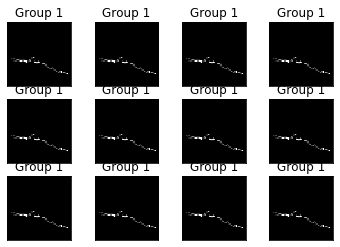